In [47]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## keypoints using MP holistic

In [48]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [49]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [50]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [51]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [52]:

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        # print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        cv2.imshow("Feed", image)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

cap.release()
cv2.destroyAllWindows()

In [53]:
results.face_landmarks

landmark {
  x: 0.7270344495773315
  y: 0.4307989180088043
  z: -0.021646643057465553
}
landmark {
  x: 0.7212218642234802
  y: 0.3974951207637787
  z: -0.048312846571207047
}
landmark {
  x: 0.7255253195762634
  y: 0.4064047038555145
  z: -0.023046419024467468
}
landmark {
  x: 0.713749349117279
  y: 0.3561652600765228
  z: -0.037924088537693024
}
landmark {
  x: 0.7201482057571411
  y: 0.38531002402305603
  z: -0.0524568185210228
}
landmark {
  x: 0.7203770279884338
  y: 0.36816880106925964
  z: -0.05008444935083389
}
landmark {
  x: 0.7227028012275696
  y: 0.32589712738990784
  z: -0.029463980346918106
}
landmark {
  x: 0.662476122379303
  y: 0.32560640573501587
  z: 0.01856839470565319
}
landmark {
  x: 0.722274899482727
  y: 0.29362595081329346
  z: -0.026380864903330803
}
landmark {
  x: 0.7211405634880066
  y: 0.27658480405807495
  z: -0.030196646228432655
}
landmark {
  x: 0.7189235687255859
  y: 0.21229347586631775
  z: -0.027210066094994545
}
landmark {
  x: 0.727583408355712

In [54]:
draw_landmarks(frame, results)

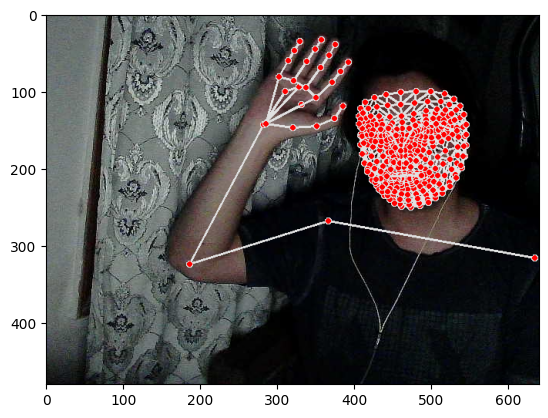

In [55]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Extract Keywords

In [56]:
# len(results.left_hand_landmarks.landmark)

In [57]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [58]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [59]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [60]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [61]:
result_test = extract_keypoints(results)

In [62]:
result_test

array([ 0.71942192,  0.36921948, -0.84688294, ...,  0.51551378,
        0.07409635, -0.03333106])

In [63]:
np.save('0', result_test)

In [64]:
np.load('0.npy')

array([ 0.71942192,  0.36921948, -0.84688294, ...,  0.51551378,
        0.07409635, -0.03333106])

## Setup folders for Collection

In [65]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array([
    'Good morning', 
    'How are you', 
    'I am fine', 
    'Thank you', 
    'What is your name', 
    'Nice to meet you', 
    'Can you help me', 
    'Listen to me'
   
])

# Fourty videos worth of data
no_sequences = 40


# Videos are going to be 40 frames in length
sequence_length = 40

# Folder start
start_folder = 40 

In [15]:
for action in actions:
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## Collect keypoint values for training and testing

In [32]:
# for action in actions[4:5]:
#     print(action)

What is your name


In [33]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions[4:5]:
        # Loop through sequences aka videos
        for sequence in range(sequence_length):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(900)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(40) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

## 6. Preprocess Data and Create Labels and Features

In [66]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'Good morning': 0,
 'How are you': 1,
 'I am fine': 2,
 'Thank you': 3,
 'What is your name': 4,
 'Nice to meet you': 5,
 'Can you help me': 6,
 'Listen to me': 7}

In [67]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [68]:
np.array(sequences).shape

(320, 40, 1662)

In [69]:
np.array(labels).shape

(320,)

In [70]:
X = np.array(sequences)
X.shape

(320, 40, 1662)

In [71]:
y = to_categorical(labels).astype(int)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [73]:
y_test.shape

(16, 8)

## 7. Build and Train LSTM Neural Network

In [74]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard
import os
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [75]:
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(40,1662)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [13]:
from keras.optimizers import Adam


# Try a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [53]:
from keras.callbacks import EarlyStopping

# Split training data into train and validation
validation_split = 0.2  # 20% of training data for validation

# Early stopping configuration
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    min_delta=0.001,     # Minimum change to qualify as an improvement
    patience=30,         # Number of epochs to wait before early stopping
    restore_best_weights=True,
    verbose=1
)

# Model training with both callbacks
history = model.fit(
    X_train, 
    y_train,
    validation_split=validation_split,
    epochs=2000,
    batch_size=32,      # Adjust based on your GPU/CPU memory
    callbacks=[early_stopping, tb_callback],
    verbose=1
)

Epoch 1/2000
8/8 [==============================] - 4s 379ms/step - loss: 2.0887 - categorical_accuracy: 0.0864 - val_loss: 2.0942 - val_categorical_accuracy: 0.1639
Epoch 2/2000
8/8 [==============================] - 2s 286ms/step - loss: 2.0707 - categorical_accuracy: 0.1440 - val_loss: 2.0847 - val_categorical_accuracy: 0.1148
Epoch 3/2000
8/8 [==============================] - 2s 283ms/step - loss: 2.0746 - categorical_accuracy: 0.1523 - val_loss: 2.0779 - val_categorical_accuracy: 0.0984
Epoch 4/2000
8/8 [==============================] - 2s 290ms/step - loss: 2.0695 - categorical_accuracy: 0.1770 - val_loss: 2.0660 - val_categorical_accuracy: 0.0984
Epoch 5/2000
8/8 [==============================] - 2s 296ms/step - loss: 2.0540 - categorical_accuracy: 0.1811 - val_loss: 2.0640 - val_categorical_accuracy: 0.1148
Epoch 6/2000
8/8 [==============================] - 2s 294ms/step - loss: 2.0607 - categorical_accuracy: 0.2058 - val_loss: 2.0512 - val_categorical_accuracy: 0.1311
Epoc

## 8. Make Predictions

In [80]:
res = model.predict(X_test)
actions[np.argmax(res[4])]

1/1 [==============================] - 0s 64ms/step


'Good morning'

In [81]:
actions[np.argmax(y_test[4])]

'Good morning'

## 9. Save Weights

In [56]:
model.save('sign_model_v3.h5')

In [46]:
# del model

In [82]:
model.load_weights('sign_model_v3.h5')

## 10. Evaluation using Confusion Matrix and Accuracy

In [83]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)

1/1 [==============================] - 0s 70ms/step


array([[[13,  1],
        [ 0,  2]],

       [[14,  0],
        [ 0,  2]],

       [[15,  0],
        [ 0,  1]],

       [[15,  0],
        [ 0,  1]],

       [[14,  0],
        [ 0,  2]],

       [[14,  0],
        [ 0,  2]],

       [[12,  0],
        [ 1,  3]],

       [[14,  0],
        [ 0,  2]]], dtype=int64)

In [84]:
accuracy_score(ytrue, yhat)

0.9375